# EEG Data Loading Demo

This notebook demonstrates how to load EEG data with familiarity labels using the `RawEEGLoader`.

In [3]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))
import numpy as np
import matplotlib.pyplot as plt
from config import PARTICIPANT_INFO, DATA_DIR
from data.loaders.raw_loader import RawEEGLoader, load_raw_eeg

## 1. Check Available Participants

In [4]:
for subj_id, info in PARTICIPANT_INFO.items():
    print(f"{subj_id}: {info['name']} -> {info['eeg_file']}")

Sub01: yannick -> Yanick.vhdr
Sub02: daniel -> daniel_1_eeg.vhdr
Sub03: simon -> Simon.vhdr
Sub04: karsten -> karsten.vhdr
Sub05: philipp -> philipp.vhdr


## 2. Load Single Participant

Using the convenience function with default settings (familiarity_binary labels).

In [5]:
eeg_path = DATA_DIR
print(eeg_path)

c:\Users\yanni\Desktop\TUM MSEI\2. Semester\Lab\raw_eeg


In [4]:
# Pick a participant
participant_id = "Sub05"
eeg_file = PARTICIPANT_INFO[participant_id]['eeg_file']
eeg_path = DATA_DIR / participant_id / eeg_file

print(f"Loading: {eeg_path}")
print(f"File exists: {eeg_path.exists()}")

Loading: c:\Users\yanni\Desktop\TUM MSEI\2. Semester\Lab\raw_eeg\Sub05\philipp.vhdr
File exists: True


In [5]:
# Load with default target (familiarity_binary)
data = load_raw_eeg(
    filepath=eeg_path,
    participant_id=participant_id,
    target_type="familiarity_binary"
)

print(data)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Excluded 4 trials due to ambiguous ratings: [16, 17, 51, 61]
Final epoch count: 73 (from 77 original)
EEGDataContainer(X=(73, 30, 17501), sfreq=500Hz, duration=35.00s, y=(73,), participant='Sub05')


## 3. Explore the EEGDataContainer

In [9]:
# Basic properties
print(f"Shape: {data.shape}")
print(f"  - Trials: {data.n_trials}")
print(f"  - Channels: {data.n_channels}")
print(f"  - Timepoints: {data.n_timepoints}")
print(f"  - Duration: {data.duration:.1f} seconds")
print(f"  - Sampling rate: {data.sfreq} Hz")
print(f"\nParticipant: {data.participant_id}")
print(f"\nChannels: {data.ch_names}")

Shape: (73, 30, 17501)
  - Trials: 73
  - Channels: 30
  - Timepoints: 17501
  - Duration: 35.0 seconds
  - Sampling rate: 500 Hz

Participant: Sub05

Channels: ['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2']


In [10]:
# Labels
print(f"Labels shape: {data.y.shape}")
print(f"Label distribution:")
print(f"  - Unfamiliar (0): {np.sum(data.y == 0)}")
print(f"  - Familiar (1): {np.sum(data.y == 1)}")

Labels shape: (73,)
Label distribution:
  - Unfamiliar (0): 42
  - Familiar (1): 31


In [11]:
# Metadata
print("Metadata:")
for key, value in data.metadata.items():
    if key != 'preprocessing_config':  # Skip verbose config
        print(f"  {key}: {value}")

Metadata:
  source: raw_braindecode
  raw_file: c:\Users\yanni\Desktop\TUM MSEI\2. Semester\Lab\raw_eeg\Sub05\philipp.vhdr
  n_events_original: 236
  n_epochs_original: 77
  n_epochs_final: 73
  excluded_trials_crash: []
  excluded_trials_labels: [16, 17, 51, 61]
  kept_trial_nums: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
  original_sfreq: 500.0
  target_type: familiarity_binary


## 4. Different Target Types

In [12]:
# Load with origin_pool target (no trials excluded for ambiguous ratings)
data_pool = load_raw_eeg(
    filepath=eeg_path,
    participant_id=participant_id,
    target_type="origin_pool"
)

print(f"origin_pool: {data_pool.n_trials} trials")
print(f"  - Unfamiliar pool (0): {np.sum(data_pool.y == 0)}")
print(f"  - Familiar pool (1): {np.sum(data_pool.y == 1)}")

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Final epoch count: 77 (from 77 original)
origin_pool: 77 trials
  - Unfamiliar pool (0): 43
  - Familiar pool (1): 34


In [13]:
# Load without labels (for custom label assignment)
data_no_labels = load_raw_eeg(
    filepath=eeg_path,
    participant_id=participant_id,
    load_labels=False
)

print(f"Without labels: {data_no_labels.n_trials} trials")
print(f"Labels: {data_no_labels.y}")

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Final epoch count: 77 (from 77 original)
Without labels: 77 trials
Labels: None


## 5. Visualize EEG Data

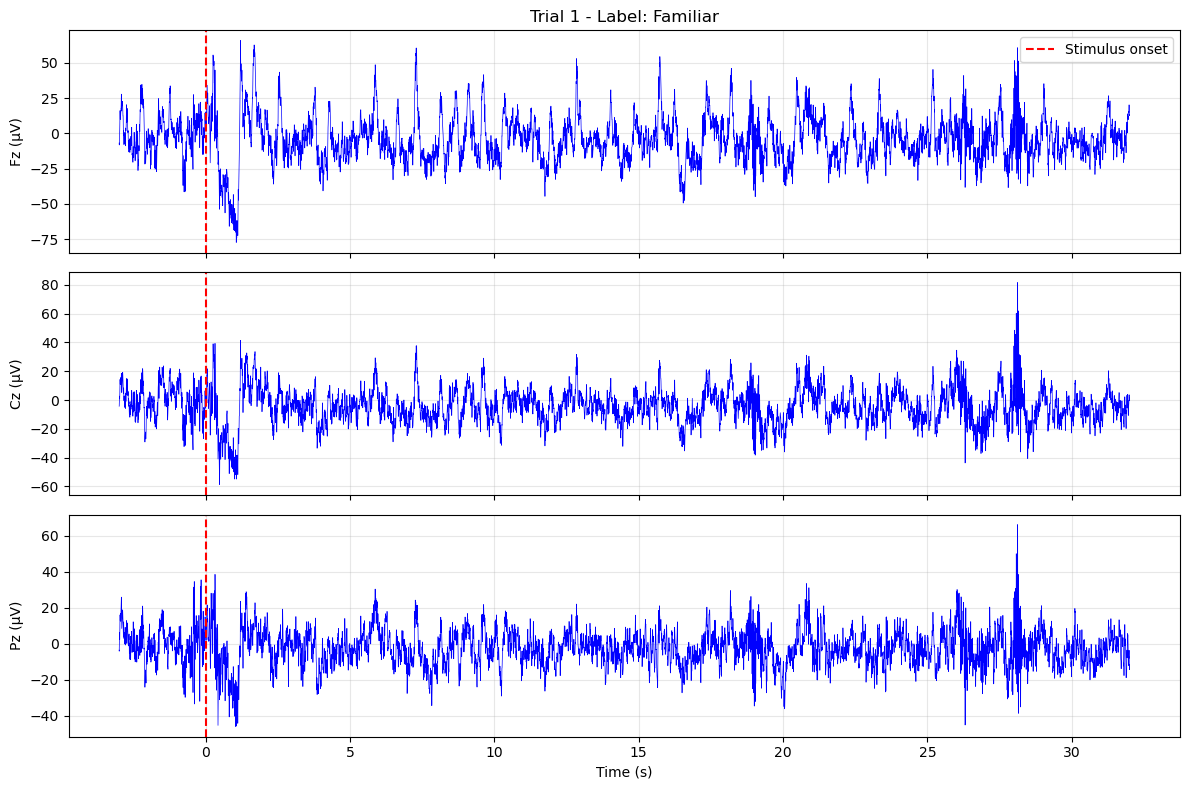

In [14]:
# Plot a single trial
trial_idx = 0
time = np.arange(data.n_timepoints) / data.sfreq + data.metadata['preprocessing_config']['epoch_tmin']

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot 3 representative channels
channels_to_plot = ['Fz', 'Cz', 'Pz']
for ax, ch_name in zip(axes, channels_to_plot):
    if ch_name in data.ch_names:
        ch_idx = data.ch_names.index(ch_name)
        ax.plot(time, data.X[trial_idx, ch_idx, :] * 1e6, 'b-', linewidth=0.5)
        ax.set_ylabel(f'{ch_name} (µV)')
        ax.axvline(0, color='r', linestyle='--', label='Stimulus onset')
        ax.grid(True, alpha=0.3)

axes[-1].set_xlabel('Time (s)')
axes[0].set_title(f'Trial {trial_idx + 1} - Label: {"Familiar" if data.y[trial_idx] == 1 else "Unfamiliar"}')
axes[0].legend()
plt.tight_layout()
plt.show()

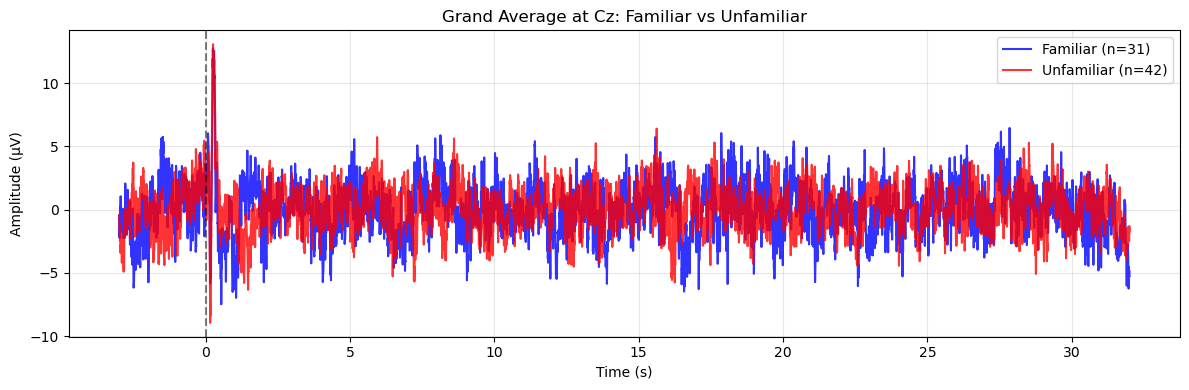

In [15]:
# Compare familiar vs unfamiliar (averaged)
familiar_trials = data.X[data.y == 1]
unfamiliar_trials = data.X[data.y == 0]

# Average across trials
familiar_avg = familiar_trials.mean(axis=0)
unfamiliar_avg = unfamiliar_trials.mean(axis=0)

# Plot Cz channel
ch_idx = data.ch_names.index('Cz')

plt.figure(figsize=(12, 4))
plt.plot(time, familiar_avg[ch_idx, :] * 1e6, 'b-', label=f'Familiar (n={len(familiar_trials)})', alpha=0.8)
plt.plot(time, unfamiliar_avg[ch_idx, :] * 1e6, 'r-', label=f'Unfamiliar (n={len(unfamiliar_trials)})', alpha=0.8)
plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title('Grand Average at Cz: Familiar vs Unfamiliar')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Convert to PyTorch

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # To prevent the kernel from dying.
import torch

In [2]:
import torch

os.environ['KMP_DUPLICATE_LIB_OK']='True' # To prevent the kernel from dying.
from torch.utils.data import TensorDataset, DataLoader

In [6]:
# Convert to tensors
X_tensor = torch.tensor(data.X, dtype=torch.float32)
y_tensor = torch.tensor(data.y, dtype=torch.long)

print(f"X shape: {X_tensor.shape}")  # (n_trials, n_channels, n_timepoints)
print(f"y shape: {y_tensor.shape}")  # (n_trials,)

# Create dataset and dataloader
dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Test iteration
for X_batch, y_batch in train_loader:
    print(f"\nBatch shapes:")
    print(f"  X: {X_batch.shape}")  # (batch_size, channels, timepoints)
    print(f"  y: {y_batch.shape}")  # (batch_size,)
    print(f"  Labels: {y_batch.tolist()}")
    break

X shape: torch.Size([73, 30, 17501])
y shape: torch.Size([73])

Batch shapes:
  X: torch.Size([4, 30, 17501])
  y: torch.Size([4])
  Labels: [0, 1, 1, 0]


## 7. Load Multiple Participants

In [7]:
loader = RawEEGLoader()
all_data = []

for subj_id, info in PARTICIPANT_INFO.items():
    eeg_path = DATA_DIR / subj_id / info['eeg_file']
    if not eeg_path.exists():
        print(f"Skipping {subj_id}: file not found")
        continue
    
    try:
        subj_data = loader.load(
            eeg_path, 
            subj_id, 
            target_type="origin_pool"  # Use origin_pool for balanced classes
        )
        all_data.append(subj_data)
        print(f"{subj_id}: {subj_data.n_trials} trials loaded")
    except Exception as e:
        print(f"Error loading {subj_id}: {e}")

print(f"\nLoaded {len(all_data)} participants")

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Excluded 1 trials due to ambiguous ratings: [61]
Final epoch count: 60 (from 61 original)
Sub01: 60 trials loaded
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Excluded 1 trials due to ambiguous ratings: [74]
Final epoch count: 73 (from 74 original)
Sub02: 73 trials loaded
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Excluded 1 trials due to ambiguous ratings: [78]
Excluded 1 crash/manual trials: [32]
Final epoch count: 76 (from 78 original)
Sub03: 76 trials loaded
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Final epoch count: 77 (from 77 original)
Sub04: 77 trials loaded
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Final epoch count: 77 (from 77 original)
Sub05: 77 trials loaded

Loaded 5 participants


In [ ]:
# Combine all participants
if all_data:
    X_all = np.concatenate([d.X for d in all_data], axis=0)
    y_all = np.concatenate([d.y for d in all_data], axis=0)
    subjects = np.concatenate([[d.participant_id] * d.n_trials for d in all_data])

    print(f"Combined dataset:")
    print(f"  X shape: {X_all.shape}")
    print(f"  y shape: {y_all.shape}")
    print(f"  Class distribution: 0={np.sum(y_all==0)}, 1={np.sum(y_all==1)}")
    print(f"  Participants: {np.unique(subjects)}")

## 8. Container Methods

In [ ]:
# Select subset of trials
subset = data.select_trials(np.array([0, 1, 2, 3, 4]))
print(f"Subset: {subset.n_trials} trials")

# Select subset of channels
frontal = data.select_channels(['Fp1', 'Fp2', 'Fz', 'F3', 'F4'])
print(f"Frontal channels only: {frontal.n_channels} channels")

# Deep copy
data_copy = data.copy()
print(f"Copy: {data_copy.shape}")